# Stock Market Prediction Using Different Timeseries Analysis Techniques Using R

# Data gathering & understanding

 We have used getSymbol() of R to fetch data from yahoo. Our focus in the study is European Stock Market, (FTSE, CAC, DAX, IBEX, STOXX). As the dataset has date column with fixed intervals it can be looked upon as Timw Series. The Object is of class 'xts'. Each Dataset have 6 properties, (open, high, low, close, volume, and adjusted) where we will use closing values for forecasting.

# Time series introduction

## What is TimeSeries?

A time series is a sequence of data points that occur in successive order over some period of time. This can be contrasted with cross-sectional data, which captures a point in time. A time series allows one to see what factors influence certain variables from period to period

## Types of TimeSeries

Regular Time Series - Specific Intervals between Observations

Irregular Time Series - No specific Intervals between observation

Univariate Time Series - Timestamp and single variable

Multivariate Time Series - Time Stamp and Multiple Variables

# Time series components

## Secular Trend
The linear increasing or decreasing behavior of the series over time.Trend is the change in the series between two adjacent periods, this is an optional component, not necessarily present in all series. Describes movement of long term

## Seasonal variation
Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.Seasonality is always of a fixed and known period. Hence, seasonal time series are sometimes called periodic time series.

Additive model: yₜ = Level + Trend + Seasonality + Noise
Multiplicative model: yₜ = Level x Trend x Seasonality x Noise

## Cyclical fluctation 
A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. The duration of these fluctuations is usually of at least 2 years It corresponds to periodical but not seasonal variation

## Irregular variations (noise)
The random variation that can not be explained by the model, present in all series to some extent.

## Level 
Level describes the average value of the series

## Stationarity

Stationary Time Series - A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.


# Algorithms used to Solve this problem


1. ARIMA
2. Holt Winters 
3. Naive
4. Neural Network
5. Prophet
5. K. Neural Network

# Import Libraries

In [2]:
# FitAR library has been archived hence it needs to be installed in the following way
#  Step 1 Download Rtools
#Rtools: https://cran.r-project.org/bin/windows/Rtools/
#  Note: do not select the second checkbox while installation
#  R version: >=4.1.0

#  Step 2 Installation code
#packageurl <- "https://cran.r-project.org/src/contrib/Archive/FitAR/FitAR_1.94.tar.gz"
#install.packages(packageurl, repos=NULL, type="source", dependencies = TRUE)
# Install Packages for Libraries.

install.packages("installr")
install.packages("remotes")
install.packages("vars") 
install.packages("MTS")
install.packages("tseries")
install.packages("forecast")
library(remotes)
install.packages("rlang","1.0.6")
install.packages("neuralnet")
install.packages("tidyverse")
install.packages("readr")
install.packages("ggplot2", dependencies = TRUE)
install_version("FitAR","1.94")
install.packages('Metrics')
install.packages("highcharter")
install.packages("tidyquant")
install.packages("DescTools")


NameError: name 'install' is not defined

In [1]:
library(Metrics)
library(installr)
library(remotes)
library(vars) 
library(MTS)
library(tseries)
library(neuralnet)
library(TTR)
library(quantmod)
library(MASS)
library(grid)
#remove.packages("rlang")
library(ggplot2)
library(forecast)
library(reshape2)
library(FitAR)
library(readr)
library(zoo)
library(xts)
library(highcharter)
library(tidyquant)
library(prophet)
#if(!require(tsfknn)) install.packages("tsfknn")
library(tsfknn)
library(DescTools)



Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Warning message:
"package 'MTS' was built under R version 3.6.3"
Attaching package: 'MTS'

The following object is masked from 'package:vars':

    VAR

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  me

# Load Dataset

getSymbol() from package Quantmod is used to load and manage data from multiple sources.
getSymbol(https://www.rdocumentation.org/packages/quantmod/versions/0.4.20/topics/getSymbols)

In [ ]:
stockdataftse <- getSymbols ("^FTSE",auto.assign = FALSE, from = "2009-01-01", to="2022-11-11")
#head(stockdataftse)
ftsecovid<- getSymbols ("^FTSE",auto.assign = FALSE, from = "2019-12-12", to="2022-11-11")
na.approx(ftsecovid)

stockdatacac <- getSymbols ("^FCHI",auto.assign = FALSE, from = "2009-01-01", to="2022-11-11")
#head(stockdatacac)
stockdatadax <- getSymbols ("DAX",auto.assign = FALSE, from = "2009-01-01", to="2022-11-11")
#head(stockdatadax)
stockdatastoxx <- getSymbols ("^STOXX",auto.assign = FALSE, from = "2009-01-01", to="2022-11-11")
#head(stockdatastoxx)
stockdataibex <- getSymbols ("^IBEX",auto.assign = FALSE, from = "2009-01-01", to="2022-11-11")
#head(stockdataibex)



# EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [ ]:

#Missing Value check
sum(is.na(stockdataftse))
sum(is.na(ftsecovid))
sum(is.na(stockdatacac))
sum(is.na(stockdatastoxx))
sum(is.na(stockdatadax))
sum(is.na(stockdataibex))

#Frequency Check
frequency(stockdataftse)
frequency(ftsecovid)
frequency(stockdatacac)
frequency(stockdatastoxx)
frequency(stockdatadax)
frequency(stockdataibex)

# Visualizing the Data
chartSeries() from quantmod package is used to create financial charts
chartSeries(https://www.rdocumentation.org/packages/quantmod/versions/0.4.20/topics/chartSeries) 

In [ ]:
chartSeries(stockdataftse,type="line",name="FTSE50 2009-2022",theme = 'white',TA="addSMA(100,col='blue')")
chartSeries(stockdataftse, TA="addVo();addBBands();addCCI();addADX()", subset = '2022-06::', theme = 'white')
chartSeries(ftsecovid, 
            type = "candlesticks", 
            subset = '2020-01::',theme = 'white',
            show.grid = TRUE,
            major.ticks='auto', minor.ticks=TRUE,
            multi.col = FALSE,
            TA=c(addMACD(),addSMA(n=100,col = 'blue'),addSMA(n=50,col = 'red'),
            addROC(n=200,col = 'blue'),addROC(n=50,col = 'red'))) # rate of change
#chartSeries(ftsecovid,name="ftse50 2019-2022",theme = 'white')
candleChart(ftsecovid, TA=c(addMACD()), subset = '2019::2020-08', theme = 'white')

#chartSeries(stockdatanifty,name="NIFTY50 2009-2022")
chartSeries(stockdatacac,name="CAC40 2009-2022")
chartSeries(stockdatastoxx,name="STOXX 2009-2022")
chartSeries(stockdatadax,name="DAX 2009-2022")
chartSeries(stockdataibex,name="IBEX.35 2009-2022")
#since dax has data after year 2014 we are not using it further

creating dataframes for only closing prices of stock indices

In [ ]:
#take only closing price
closing_f = Cl(to.monthly(stockdataftse))
closing_fc = Cl(to.monthly(stockdataftse))
#closing_n = Cl(to.monthly(stockdatanifty))
closing_c = Cl(to.monthly(stockdatacac))
closing_s = Cl(to.monthly(stockdatastoxx))
closing_i = Cl(to.monthly(stockdataibex))
stockdata =merge.xts(closing_c,closing_f,closing_i,closing_fc,closing_s,all=TRUE)
head(stockdata)
sum(is.na(stockdata))

# Visualizing the dynamic Data
highchart() for candle stick from quantmod package is used to create financial charts

In [ ]:
zoomarkets <- as.zoo(stockdata)
autoplot(zoomarkets, facet = NULL) # plot without facets
library(webshot)


org <- highchart(type = "stock")%>%
  hc_add_series(stockdataftse)%>%
  hc_add_series(SMA(na.omit(Cl(stockdataftse)),n=50),name="SMA(50)")%>%
  hc_add_series(SMA(na.omit(Cl(stockdataftse)),n=200),name="SMA(200)")%>%
  hc_title(text="FTSE PRICE CANDLE STICK CH 2009-2022")
htmlwidgets::saveWidget(widget = org, file = "org.html")
getwd()
webshot(url = "org.html", 
        file = "org.png",
        delay=3) # delay will ensure that the whole plot appears in the image
#dev.off()
highchart(type = "stock")%>%
  hc_add_series(ftsecovid)%>%
  hc_add_series(SMA(na.omit(Cl(ftsecovid)),n=50),name="SMA(50)")%>%
  hc_add_series(SMA(na.omit(Cl(ftsecovid)),n=200),name="SMA(200)")%>%
  hc_title(text="FTSE PRICE CANDLE STICK CH 2009-2022")
highchart(type = "stock")%>%
  hc_add_series(stockdatanifty)%>%
  hc_add_series(SMA(na.omit(Cl(stockdatacac)),n=50),name="SMA(50)")%>%
  hc_add_series(SMA(na.omit(Cl(stockdatacac)),n=200),name="SMA(200)")%>%
  hc_title(text="CAC PRICE CANDLE STICK CH 2009-2022")
 org<-highchart(type = "stock")%>%
  hc_add_series(Cl(stockdataftse),name="FTSE")%>%
  hc_add_series(Cl(stockdatacac),name="CAC")%>%
  hc_title(text="FTSE VS CAC PRICE 2009-2022")
htmlwidgets::saveWidget(widget = org, file = "org1.html")
getwd()
webshot(url = "org1.html", 
        file = "org1.png",
        delay=3) # delay will ensure that the whole plot appears in the image
dev.off()


# STOCK RETURN ANALYSIS

In [ ]:
#STOCK RETURN ANALYSIS
#calculate monthly
ftsertn = dailyReturn(Cl(closing_f))
cacrtn = dailyReturn(Cl(closing_c))
#combine
strtns1= data.frame(Date=as.Date(index(ftsertn),format="%b %Y"),coredata(ftsertn))
strtns2= data.frame(Date=as.Date(index(cacrtn),format="%b %Y"),coredata(cacrtn))
strtns=merge(strtns1,strtns2,by="Date")
names(strtns)=c("Date","ftse return","cac return")
str(strtns)
library(timetk)
strtns=xts::xts(strtns[,-1],order.by = strtns$Date)
#plot
charts.PerformanceSummary(strtns, main = "ftse vs cac dailyreturn")

## Data Preparation

In [ ]:
#forecast for n days
n=60
N=2

#### TRAIN - TEST SPLIT
#library(xts)
attr(stockdata,'frequency')<-12
stdata <- as.ts(Cl(stockdata), start = c(2009,2))
colnames(stdata)=c("CAC","FTSE","IBEX","ftsecovid","STOXX")

str(stdata)
sum(is.na(stdata))
head(stdata)
attr(stockdataftse,'frequency')<-260
stfse <- as.ts(Cl(stockdataftse), start = c(2009,2))
str(stfse)
stfse=na.approx(stfse)
sum(is.na(stfse))
frequency(stfse)
ftsecovid = ftsecovid[rowSums(is.na(ftsecovid)) == 0, ]
attr(ftsecovid,'frequency')<-260
stfsecovid <- as.ts(Cl(ftsecovid), start = c(2019,248))
#na.omit(stfsecovid)
str(stfsecovid)
#stfse=na.approx(stfsecovid)
sum(is.na(stfsecovid))
frequency(stfsecovid)
#drop_na(stfsecovid)

# Data Spit

In [ ]:
#stockdataftse=na.omit(stockdataftse)
FTSEtrain=(head((stfse),length(stfse)-1000))
FTSEtest =(tail(stfse,1000))

Fcovidtrain=(head((stfsecovid),length(stfsecovid)-200))
Fcovidtest =(tail(stfsecovid,200))

## ARIMA MODEL

# 1. Stationarity test
stationary  means, having constant mean and variance over time. If a time series has no trend, constant variance over time, and a consistent autocorrelation structure across time, it is considered to be “stationary.”

An augmented Dickey-Fuller test, which uses the following null and alternative hypotheses to determine whether a time series is stationary, is one technique to do so.
H0: The time series is non-stationary. we need to make it stationary.
HA: The time series is stationary. We can reject the null hypothesis and infer that the time series is stationary if the p-value from the test is less than some significance level (e.g. =0.05).
The adf.test(https://www.rdocumentation.org/packages/aTSA/versions/3.1.2/topics/adf.test) function from the tseries package can be used to run an augmented Dickey-Fuller test.


In [ ]:
#adf test for stationarity 
adf.test(FTSEtrain)
adf.test(Fcovidtrain)

p value is 0.04 that is less than 0.05 hence we can reject null hypotesis and assume data is stationary.

# Decomposing Time Series

Time Series is decomposed to estimate trends,seasonality and random components in the dataset. decompose() is used for it.
decompose(https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/decompose)


In [ ]:
#1. additive decompose

ftsedc <- decompose(FTSEtrain)#,type = 'additive',filter = NULL)
plot(ftsedc)
ftsedc1 = FTSEtrain-ftsedc$seasonal

ftsecovdc <- decompose(Fcovidtrain)#,type = 'additive',filter = NULL)
plot(ftsecovdc)#frequency(FTSE)
ftsecovdc1 = Fcovidtrain-ftsecovdc$seasonal

#2. Multiplicative Decompose
plot(decompose(FTSEtrain,type='multiplicative'))
plot(decompose(Fcovidtrain,type='multiplicative'))



## Stationarity

In [ ]:
#Testing for Stationarity by applying Augmented Dicker-Fuller Test on all column values of datset
#stationary  means, having constant mean and variance over time
adf.test(ftsedc1)
adf.test(ftsecovdc1)
fstnry=diff(ftsedc1,2)
fcstnry=diff(ftsecovdc1,2)
adf.test(fstnry)
adf.test(fcstnry)


Autocorrelation analysis is an important step in the Exploratory Data Analysis (EDA) of time series. The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness. It is especially important when you intend to use an ARIMA model for forecasting because the autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.
ACF and PACF assume stationarity of the underlying time series. 

Autocorrelation Function (ACF)
Correlation between time series with a lagged version of itself. The correlation between the observation at the current time spot and the observations at previous time spots.The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

Partial Autocorrelation Function (PACF)
Additional correlation explained by each successive lagged term. The correlation between pbservations at two time spots given that we consider both observations are correlated to observations at other time spots.

Order of AR, MA, and ARMA Model
To determine the order of the model, you can use the following table:

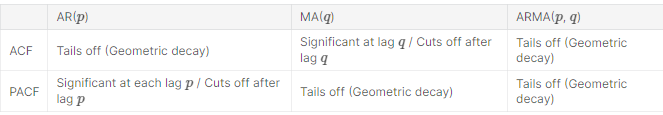

In [ ]:
#To find the Correlation using Autocorrelation Function and Partial Autocorrelation Function of our series
PlotACF(fstnry,  lag.max = 10 * log10(length(fstnry)), main = NULL, cex = NULL)
PlotGACF(fstnry, lag.max = 10 * log10(length(fstnry)), type = "cor", ylab = NULL)
PlotACF(fcstnry, lag.max = 10 * log10(length(fcstnry)), main = NULL, cex = NULL)
PlotGACF(fcstnry, lag.max = 10 * log10(length(fcstnry)), type = "cor", ylab = NULL)



## Model
auto.arima() Returns best ARIMA model according to either AIC, AICc or BIC value. 
forecast()  is used to create forecast  for n days.  

In [ ]:
#auto arima
fit=auto.arima(ftsedc1, trace=TRUE)
plot(forecast(fit,h=n))
fit1=auto.arima(ftsecovdc1, trace=TRUE)
plot(forecast(fit1,h=n))


## Fitting arima
auto arima gave (0,1,0) as best model

In [ ]:
arimamodelftse <- arima(ftsedc1,order=c(0,1,0))
plot(forecast(arimamodelftse,h=n))
ftse1 <- arima(ftsedc1,order=c(2,1,2))
plot(forecast(ftse1,h=n))
ftse2 <- arima(ftsedc1,order=c(1,1,1))
plot(forecast(ftse2,h=n))
ftse3 <- arima(ftsedc1,order=c(1,1,0))
plot(forecast(ftse3,h=n))

arimamodelfcovid <- arima(ftsecovdc1,order=c(0,1,0))
plot(forecast(arimamodelfcovid,h=n))
#arimamodelftsem <- arima(ftsemonthtrain,order=c(0,1,0))



checkresiduals is available in forecast package.: Check that residuals from a time series model look like white noise

In [ ]:
#Visualizing the residuals
#plot(arimamodelftse$residuals)
#checkresiduals(fit)
checkresiduals(arimamodelftse)
checkresiduals(arimamodelfcovid)

## Box-Pierce and Ljung-Box Tests 
box.test((https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Box.test):) is in stats package in r
Compute the Box--Pierce or Ljung--Box test statistic for examining the null hypothesis of independence in a given time series.
The Ljun-Box test is a hypothesis test that checks if a time series contains an autocorrelation. The null Hypothesis H0 is that the residuals are independently distributed. The alternative hypothesis is that the residuals are not independently distributed and exhibit a serial correlation.
p-value smaller than .01, we can reject the null hypothesis, indicating the time series does contain an autocorrelation.

In [ ]:
#Performing Ljung Box  test
Box.test(arimamodelftse$residuals,type="Ljung-Box",lag = 520 )
Box.test(arimamodelfcovid$residuals,type="Ljung-Box",lag = 520 )
#Box.test(arimamodelftsem$residuals,type="Ljung-Box")


In [ ]:
predicted_valuesftse = forecast(arimamodelftse,h=1000, level=c(99.5))
plot(predicted_valuesftse)
predicted_valuesfcovid = forecast(arimamodelfcovid,h=200, level=c(99.5))
plot(predicted_valuesfcovid)
#predicted_valuesftsem = forecast(arimamodelftsem,h=N, level=c(99.5))
#plot(predicted_valuesftsem
pftse1=forecast(ftse1,h=1000, level=c(99.5))
pftse2=forecast(ftse2,h=1000, level=c(99.5))
pftse3=forecast(ftse3,h=1000, level=c(99.5))

In [ ]:
#predicted_valuesftse = forecast(arimamodelftse,h=1000, level=c(99.5))
df_arimaftse = as.data.frame(predicted_valuesftse)
arimaftse = df_arimaftse$`Point Forecast`
dataftse = as.data.frame(FTSEtest)
dataftse$arima = arimaftse
colnames(dataftse) = c("test","predicted")
dataftse$x = 1:1000
dataftse.melted <- melt(dataftse, id="x")
qplot(x=x, y=value, color=variable, data=dataftse.melted, geom="line")

#predicted_valuesfcovid = forecast(arimamodelfcovid,h=200, level=c(99.5))
df_arimafcovid = as.data.frame(predicted_valuesfcovid)
arimaftsecov = df_arimafcovid$`Point Forecast`
datafcov = as.data.frame(Fcovidtest)
datafcov$arima = arimaftsecov
colnames(datafcov) = c("test","predicted")
datafcov$x = 1:200
datafcov.melted <- melt(datafcov, id="x")
qplot(x=x, y=value, color=variable, data=dataftse.melted, geom="line")


In [ ]:
#create model

arimamodelftse %>%
  forecast(h=1000+n) %>%
  autoplot() + autolayer(FTSEtest,start=length(FTSEtrain),series = "test data")


arimamodelfcovid %>%
  forecast(h=200+n) %>%
  autoplot() + autolayer(Fcovidtest,start=length(Fcovidtrain),series = "test data")


## Accuracy
accuracy function is avalablein forecast package in r: Accuracy measures for a forecast model
Returns range of summary measures of the forecast accuracy. If x is provided, the function measures test set forecast accuracy based on x-f. If x is not provided, the function only produces training set accuracy measures of the forecasts based on f["x"]-fitted(f). accuracy(https://www.rdocumentation.org/packages/forecast/versions/8.15/topics/accuracy)
The measures calculated are:

ME: Mean Error

RMSE: Root Mean Squared Error

MAE: Mean Absolute Error

MPE: Mean Percentage Error

MAPE: Mean Absolute Percentage Error

MASE: Mean Absolute Scaled Error

ACF1: Autocorrelation of errors at lag 1.

In [ ]:
#accuracy train metrics
ac_trainmatrix=data.frame()
ac_testmatrix=data.frame()
ac_trainmatrixcov=data.frame()
ac_testmatrixcov=data.frame()

In [ ]:
print("ARIMA(0,1,0) train")
accuracy(predicted_valuesftse)
print("ARIMA (2,1,2) TRAIN")
accuracy(pftse1)
print("ARIMA (1,1,1) TRAIN")
accuracy(pftse2)
print("ARIMA (1,1,0) TRAIN")
accuracy(pftse3)


In [ ]:
print("train metrics")
ac_trainmatrix = accuracy(predicted_valuesftse)
ac_trainmatrixcov = accuracy(predicted_valuesfcovid)
ac_trainmatrix
#test metrics
print("test metrics")
ac_testmatrix=accuracy(FTSEtest,arimaftse)
ac_testmatrixcov=accuracy(Fcovidtest,arimaftsecov)
ac_testmatrix


# Naive 
A naive forecast is one in which the forecast for a given period is simply equal to the value observed in the previous period.


In [ ]:
ftsena = naive(stfse,h=1000)
autoplot(ftsena)+
  autolayer(FTSEtest,start = length(FTSEtrain),series="FTSE Test Date")
checkresiduals(ftsena)


fcovna = naive(stfsecovid,h=200)
autoplot(fcovna)+
  autolayer(Fcovidtest,start = length(Fcovidtrain),series="FTSE covid Test Date")
checkresiduals(fcovna)


In [ ]:
#accuracy(ftsena)
ac_trainmatrix=rbind(ac_trainmatrix,accuracy(ftsena))
ac_trainmatrix
df_ftse = as.data.frame(ftsena)
ftnaive= df_ftse$`Point Forecast`
####
print(paste0("RMSE: ", rmse(FTSEtest, ftnaive)))
print(paste0("MAPE: ", mape(FTSEtest, ftnaive)))
ac_testmatrix=rbind(ac_testmatrix,accuracy(FTSEtest,ftnaive))
####
ac_trainmatrixcov=rbind(ac_trainmatrixcov,accuracy(fcovna))
ac_trainmatrixcov
df_ftsecov = as.data.frame(fcovna)
ftnaivecov= df_ftsecov$`Point Forecast`
####
ac_testmatrixcov=rbind(ac_testmatrixcov,accuracy(Fcovidtest,ftnaivecov))


# Holt Winter
HoltWinters(https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/HoltWinters) is used
Computes Holt-Winters Filtering of a given time series. Unknown parameters are determined by minimizing the squared prediction error.



In [ ]:
## HOLT-WINTERS
holtwintermodelftse<-HoltWinters(FTSEtrain,alpha=NULL, beta=NULL, gamma=NULL,seasonal = "multiplicative"  )#,gamma=FALSE)
f1=(forecast(holtwintermodelftse,h=1000))
plot(f1)
lines(f1$fitted, lty=2, col="purple")
HW=predict(holtwintermodelftse,1000,prediction.interval = TRUE,level=0.95)
plot(FTSEtrain)
#lines(HW["fit"][,1], lty=2, col="blue")
lines(f1$fitted, lty=2, col="purple")
lines(HW[,1], col="red")
lines(HW[,2], lty=2, col="orange")
lines(HW[,3], lty=2, col="orange")


#predftse <- as.data.frame(forecast(holtwintermodelftse))
holtwintermodelftsecov<-HoltWinters(Fcovidtrain, alpha = NULL,beta=NULL,gamma=NULL)#,gamma=FALSE)
f1=(forecast(holtwintermodelftsecov,h=200))
plot(f1)
lines(f1$fitted, lty=2, col="purple")

In [ ]:
# Check residuals
acf(f1$residuals, lag.max=20, na.action=na.pass)
Box.test(f1$residuals, lag=20, type="Ljung-Box")
hist(f1$residuals)
#It's important to use na.action=na.pass because the last value of $residuals is always NA, otherwise the function throws an error.


In [ ]:
### Holt winters Train Forecast Plot
predicted_valuesftse = forecast(holtwintermodelftse,h=1000)
plot(predicted_valuesftse)
### Holt winters Train Test Forecast Plot
df_opftse = as.data.frame(predicted_valuesftse)
hwftse = df_opftse$`Point Forecast`
dataftse = as.data.frame(FTSEtest)
dataftse$arima = hwftse
colnames(dataftse) = c("test","predicted")
dataftse$x = 1:1000
dataftse.melted <- melt(dataftse, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=dataftse.melted, geom="line")

predicted_valuesfcovid = forecast(holtwintermodelftsecov,h=200)
plot(predicted_valuesfcovid)
### Holt winters Train Test Forecast Plot
df_opftsecov = as.data.frame(predicted_valuesfcovid)
hwftsecov = df_opftsecov$`Point Forecast`
dataftsecov = as.data.frame(Fcovidtest)
dataftsecov$arima = hwftsecov
colnames(dataftsecov) = c("test","predicted")
dataftsecov$x = 1:200
dataftsecov.melted <- melt(dataftsecov, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=dataftsecov.melted, geom="line")


In [ ]:
####plot
holtwintermodelftse %>%
  forecast(h=1000+n) %>%
  autoplot() + autolayer(FTSEtest)
holtwintermodelftsecov %>%
  forecast(h=200+n) %>%
  autoplot() + autolayer(Fcovidtest)


In [ ]:
#Train Metrics
accuracy(predicted_valuesftse)
ac_trainmatrix=rbind(ac_trainmatrix,accuracy(predicted_valuesftse))
ac_testmatrix=rbind(ac_testmatrix,accuracy(FTSEtest,hwftse))

###
accuracy(predicted_valuesfcovid)
ac_trainmatrixcov=rbind(ac_trainmatrixcov,accuracy(predicted_valuesfcovid))
ac_testmatrixcov=rbind(ac_testmatrixcov,accuracy(Fcovidtest,hwftsecov))


# Neural Network
nnetar(https://www.rdocumentation.org/packages/forecast/versions/8.20/topics/nnetar) Feed-forward neural networks with a single hidden layer and lagged inputs for forecasting univariate time series.
A feed-forward neural network is fitted with lagged values of y as inputs and a single hidden layer with size nodes. The inputs are for lags 1 to p, and lags m to mP where m=frequency(y). If xreg is provided, its columns are also used as inputs. If there are missing values in y or xreg, the corresponding rows (and any others which depend on them as lags) are omitted from the fit. A total of repeats networks are fitted, each with random starting weights. These are then averaged when computing forecasts. The network is trained for one-step forecasting. Multi-step forecasts are computed recursively.

For non-seasonal data, the fitted model is denoted as an NNAR(p,k) model, where k is the number of hidden nodes. This is analogous to an AR(p) model but with nonlinear functions. For seasonal data, the fitted model is called an NNAR(p,P,k)[m] model, which is analogous to an ARIMA(p,0,0)(P,0,0)[m] model but with nonlinear functions.

In [ ]:
neuralnetworkmodelftse <- nnetar(FTSEtrain)
plot(forecast(neuralnetworkmodelftse,h=1000))
#lines(FTSEtrain)
checkresiduals(neuralnetworkmodelftse)

neuralnetworkmodelftsecov <- nnetar(Fcovidtrain)
plot(forecast(neuralnetworkmodelftsecov,h=200))
checkresiduals(neuralnetworkmodelftsecov)



In [ ]:
### Neural Network Train Forecast Plot
predicted_valuesftse <- forecast(neuralnetworkmodelftse,1000,level=c(80,95))#,PI=TRUE)
plot(predicted_valuesftse)
predicted_valuesftsecov <- forecast(neuralnetworkmodelftsecov,200,level=c(80,95))#,PI=TRUE)
plot(predicted_valuesftsecov)

### Neural Network Train Test Forecast Plot
#predicted_values = forecast(neuralnetworkmodel,h=30)
df_opftse = as.data.frame(predicted_valuesftse)
nnftse = df_opftse$`Point Forecast`
dataftse = as.data.frame(FTSEtest)
dataftse$arima = nnftse
colnames(dataftse) = c("test","predicted")
dataftse$x = 1:1000
dataftse.melted <- melt(dataftse, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=dataftse.melted, geom="line")

#predicted_values = forecast(neuralnetworkmodel,h=30)
df_opftsecov = as.data.frame(predicted_valuesftsecov)
nnftsecov = df_opftsecov$`Point Forecast`
dataftsecov = as.data.frame(Fcovidtest)
dataftsecov$arima = nnftsecov
colnames(dataftsecov) = c("test","predicted")
dataftsecov$x = 1:200
dataftsecov.melted <- melt(dataftsecov, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=dataftsecov.melted, geom="line")


In [ ]:
neuralnetworkmodelftse %>%
  forecast(h=n+n) %>%
  autoplot() + autolayer(FTSEtest)


neuralnetworkmodelftsecov %>%
  forecast(h=n+n) %>%
  autoplot() + autolayer(Fcovidtest)


In [ ]:
#Train Metrics
accuracy(predicted_valuesftse)
ac_trainmatrix=rbind(ac_trainmatrix,accuracy(predicted_valuesftse))
accuracy(FTSEtest,nnftse)
ac_testmatrix=rbind(ac_testmatrix,accuracy(FTSEtest,nnftse))

#Train Metrics
accuracy(predicted_valuesftsecov)
ac_trainmatrixcov=rbind(ac_trainmatrixcov,accuracy(predicted_valuesftsecov))
accuracy(Fcovidtest,nnftsecov)
ac_testmatrixcov=rbind(ac_testmatrixcov,accuracy(Fcovidtest,nnftsecov))


# Prophet
Prophet is a forecasting procedure implemented in R and Python. It is fast and provides completely automated forecasts that can be tuned by hand by data scientists and analysts. Implements a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well

In [ ]:
#We convert dataset as prophet input requires
df <- data.frame(ds=(index(stockdataftse)),y=as.numeric(stockdataftse[,'FTSE.Close']))
#prophet model application
library(prophet)
str(df)

dfcov <- data.frame(ds=(index(ftsecovid)),y=as.numeric(ftsecovid[,'FTSE.Close']))
#prophet model application
#library(prophet)
str(dfcov)



make_future_dataframe() Make dataframe with future dates for forecasting. predict() is used for prediction
yhat : It contains the prediction/forecast values of the time series model. yhat_lower : It contains the lower bound of the prediction/forecast values. yhat_upper : It contains the upper bound of the prediction/forecast values which are used for forecast() function

In [ ]:
prophetpred <- prophet(df)#,daily.seasonality = TRUE)
future <- make_future_dataframe(prophetpred,periods = 260)#, include_history = TRUE)
head(future)
forecastprophet <- predict(prophetpred, future)
head(forecastprophet)
fp=forecast(forecastprophet$yhat,h=n)
plot(fp)
plot(prophetpred,forecastprophet)
prophet_plot_components(prophetpred,forecastprophet)
###
prophetpredcov <- prophet(dfcov)#,daily.seasonality = TRUE)
future1 <- make_future_dataframe(prophetpredcov,periods = 260)#, include_history = TRUE)
head(future1)
forecastprophetcov <- predict(prophetpredcov, future1)
head(forecastprophetcov)
fpcov=forecast(forecastprophetcov$yhat,h=n)
plot(fpcov)
plot(prophetpredcov,forecastprophetcov)
prophet_plot_components(prophetpredcov,forecastprophetcov)



In [ ]:
#Creating train prediction dataset to compare the real data
dataprediction <- data.frame(forecastprophet$ds,forecastprophet$yhat)
trainlen <- length(stockdataftse)
dataprediction <- dataprediction[c(1:trainlen),]
tail(forecastprophet[c("ds", "yhat", "yhat_lower", "yhat_upper")])

#Creating train prediction dataset to compare the real data
datapredictioncov <- data.frame(forecastprophetcov$ds,forecastprophetcov$yhat)
trainlencov <- length(ftsecovid)
datapredictioncov <- dataprediction[c(1:trainlencov),]
tail(forecastprophetcov[c("ds", "yhat", "yhat_lower", "yhat_upper")])



In [ ]:
#Creating cross validation 
accuracy(fp)
#accuracy(forecastprophet$yhat,df$y)
ac_trainmatrix=rbind(ac_trainmatrix,accuracy(fp))
accuracy(dataprediction$forecastprophet.yhat,df$y)
ac_testmatrix=rbind(ac_testmatrix,accuracy(forecastprophet$yhat,df$y))
#Creating cross validation 
accuracy(fpcov)
#accuracy(forecastprophetcov$yhat,dfcov$y)
ac_trainmatrixcov=rbind(ac_trainmatrixcov,accuracy(fpcov))
accuracy(datapredictioncov$forecastprophet.yhat,dfcov$y)
ac_testmatrixcov=rbind(ac_testmatrixcov,accuracy(forecastprophetcov$yhat,dfcov$y))



# KNN
KNN which stand for K Nearest Neighbor is a Supervised Machine Learning algorithm that classifies a new data point into the target class, depending on the features of its neighboring data points.  the KNN algorithm classifies data points based on how similar they are to their neighboring data point. KNN is a non-parametric model which means that it does not make any assumptions about the data set. This makes the algorithm more effective since it can handle realistic data.
USES KNN_FORECASTING() from tsfknn package. With the amount of data that we’re generating, the need for advanced Machine Learning Algorithms has increased. One such algorithm is the K Nearest Neighbour algorithm. In this blog on KNN Algorithm In R, you will understand how the KNN algorithm works and its implementation using the R Language. It applies KNN regression to forecast the future values of a time series. The lags used as autoregressive variables are set with the lags parameter. If the user does not set the number of nearest neighbors or the lags, these values are selected automatically.

In [ ]:
#Loading time series forecasting nearest neighbors package
if(!require(tsfknn)) install.packages("tsfknn")
library(tsfknn)
predknn <- knn_forecasting(FTSEtrain, h = 1000, lags = 1:260, k = 50,transform = "additive", msas = "MIMO", cf="mean")
knn_examples(predknn)
(predknn$prediction)
autoplot(predknn)

predknncov <- knn_forecasting(Fcovidtrain, h = 200, lags = 1:260, k = 23,transform = "additive", msas = "MIMO", cf="mean")
knn_examples(predknncov)
(predknncov$prediction)
plot(predknncov)

In [ ]:
nearest_neighbors(predknn)
autoplot(predknn, highlight = "neighbors",faceting = FALSE)
nearest_neighbors(predknncov)
autoplot(predknncov, highlight = "neighbors",faceting = FALSE)



In [ ]:
#Train set model accuracy
#accuracy(predknn)
ro <- rolling_origin(predknn,h=n,rolling = FALSE)
#ro$test_sets
#ro$predictions
#ro$errors
print(ro$global_accu)
plot(ro,h=n)
A=ac_testmatrix
RMSE=ro[["global_accu"]][["RMSE"]]
MAE=ro[["global_accu"]][["MAE"]]
MAPE=ro[["global_accu"]][["MAPE"]]
row=c(0,RMSE,MAE,0,MAPE)
ac_testmatrix=rbind(ac_testmatrix,row)

ro <- rolling_origin(predknncov,h=n,rolling = FALSE)
#ro$test_sets
#ro$predictions
#ro$errors
print(ro$global_accu)
plot(ro,h=n)
A=ac_testmatrixcov
RMSE=ro[["global_accu"]][["RMSE"]]
MAE=ro[["global_accu"]][["MAE"]]
MAPE=ro[["global_accu"]][["MAPE"]]
row1=c(0,RMSE,MAE,0,MAPE)
ac_testmatrixcov=rbind(ac_testmatrixcov,row1)


In [ ]:
#Hidden layers creation
alpha <- 1.5^(-10)
hn <- length(FTSEtrain)/(alpha*(length(FTSEtrain)+n))
#Fitting nnetar
lambda <- BoxCox.lambda(FTSEtrain)
dnn_pred <- nnetar(FTSEtrain, size= hn, lambda = lambda)
#Fitting nnetar
dnn_forecast <- forecast(dnn_pred, h= n, PI = TRUE)
plot(dnn_forecast)

#Hidden layers creation
alpha <- 1.5^(-10)
hncov <- length(Fcovidtrain)/(alpha*(length(Fcovidtrain)+n))
#Fitting nnetar
lambda1 <- BoxCox.lambda(Fcovidtrain)
dnn_predcov <- nnetar(Fcovidtrain, size= hn, lambda = lambda1)
#Fitting nnetar
dnn_forecastcov <- forecast(dnn_predcov, h= n, PI = TRUE)
plot(dnn_forecastcov)


In [ ]:
### Neural Network Train Forecast Plot
predicted_valuesftse <- dnn_forecast
plot(predicted_valuesftse)
### Neural Network Train Test Forecast Plot
#predicted_values = forecast(neuralnetworkmodel,h=30)
df_opftse = as.data.frame(predicted_valuesftse)
dnnftse = df_opftse$`Point Forecast`
dataftse = as.data.frame(FTSEtest)
dataftse$arima = dnnftse
colnames(dataftse) = c("test","predicted")
dataftse$x = 1:n
dataftse.melted <- melt(dataftse, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=dataftse.melted, geom="line")

###########
predicted_valuesftsecov <- dnn_forecastcov
plot(predicted_valuesftsecov)
### Neural Network Train Test Forecast Plot
#predicted_values = forecast(neuralnetworkmodel,h=30)
df_opftsecov = as.data.frame(predicted_valuesftsecov)
dnnftsecov = df_opftsecov$`Point Forecast`
dataftsecov = as.data.frame(Fcovidtest)
dataftsecov$arima = dnnftsecov
colnames(dataftsecov) = c("test","predicted")
dataftsecov$x = 1:n
dataftsecov.melted <- melt(dataftsecov, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=dataftsecov.melted, geom="line")

#accuracy(dnn_forecast)
#ac_trainmatrix=rbind(ac_trainmatrix,accuracy(dnn_forecast))
#accuracy(dnn_forecast[["call"]][["y"]],dnn_forecast)


In [ ]:
#final train test predict model
dnn_pred %>%
  forecast(h=n+n) %>%
  autoplot() + autolayer(FTSEtest)

dnn_predcov %>%
  forecast(h=n+n) %>%
  autoplot() + autolayer(Fcovidtest)



In [ ]:
#accuracy metrics
accuracy(predicted_valuesftse)
ac_trainmatrix=rbind(ac_trainmatrix,accuracy(predicted_valuesftse))
accuracy(FTSEtest,dnnftse)
ac_testmatrix=rbind(ac_testmatrix,accuracy(FTSEtest,nnftse))

accuracy(predicted_valuesftsecov)
ac_trainmatrixcov=rbind(ac_trainmatrixcov,accuracy(predicted_valuesftsecov))
accuracy(Fcovidtest,dnnftsecov)
ac_testmatrixcov=rbind(ac_testmatrixcov,accuracy(Fcovidtest,nnftsecov))


In [ ]:
#ac_trainmatrix=unique(ac_trainmatrix)#[!(row.names(ac_trainmatrix)=="Training.set.3")]
#chk#.drop("Training.set.3")
model=c("arima","naive","hw","nn","prophet")
ac_trainmatrix=cbind(model,ac_trainmatrix)
ac_trainmatrix
write.csv(ac_trainmatrix,"metrix.csv",row.names = FALSE)
model=c("arima","naive","hw","nn","prophet","knn")
ac_testmatrix=cbind(model,ac_testmatrix)
ac_testmatrix
write.csv(ac_testmatrix,"testmetrix.csv",row.names = FALSE)

model=c("arima","naive","hw","nn","prophet")
ac_trainmatrixcov=cbind(model,ac_trainmatrixcov)
ac_trainmatrixcov
write.csv(ac_trainmatrixcov,"covmetrix.csv",row.names = FALSE)
model=c("arima","naive","hw","nn","prophet","knn")
ac_testmatrixcov=cbind(model,ac_testmatrixcov)
ac_testmatrixcov
write.csv(ac_testmatrixcov,"covtestmetrix.csv",row.names = FALSE)



# Final Model comparision


In [ ]:
a= read_csv("~/stockmkt/lib/metrix.csv")
B=read_csv("~/stockmkt/lib/testmetrix.csv")
c= read_csv("~/stockmkt/lib/covmetrix.csv")
d=read_csv("~/stockmkt/lib/covtestmetrix.csv")

dd_m = reshape2::melt(a, c("model"))
head(dd_m, 2)
ggplot(dd_m) + 
  geom_bar(aes(x=variable, y=value, fill=model), 
              stat="identity", # Don't transform the data
              position = "dodge" )+ggtitle("ftse train")  # Dodge the bars
ggplot(dd_m) + 
  geom_bar(aes(x=value, y=model, fill=variable), 
              stat="identity", # Don't transform the data
              position = "dodge") +ggtitle("ftse train")# Dodge the bars

dd_m = reshape2::melt(B, c("model"))
head(dd_m, 2)
ggplot(dd_m) + 
  geom_bar(aes(x=variable, y=value, fill=model), 
              stat="identity", # Don't transform the data
              position = "dodge") +ggtitle("ftse test")# Dodge the bars

ggplot(dd_m) + 
  geom_bar(aes(x=value, y=model, fill=variable), 
              stat="identity", # Don't transform the data
              position = "dodge")+ggtitle("ftse test") # Dodge the bars




dd_m = reshape2::melt(c, c("model"))
head(dd_m, 2)
ggplot(dd_m) + 
  geom_bar(aes(x=variable, y=value, fill=model), 
              stat="identity", # Don't transform the data
              position = "dodge") +ggtitle("ftsecov train")# Dodge the bars

ggplot(dd_m) + 
  geom_bar(aes(x=value, y=model, fill=variable), 
              stat="identity", # Don't transform the data
              position = "dodge") +ggtitle("ftsecov train")# Dodge the bars

dd_m = reshape2::melt(d, c("model"))
head(dd_m, 2)
ggplot(dd_m) + 
  geom_bar(aes(x=variable, y=value, fill=model), 
              stat="identity", # Don't transform the data
              position = "dodge") +ggtitle("ftse cov test")# Dodge the bars

ggplot(dd_m) + 
  geom_bar(aes(x=value, y=model, fill=variable), 
              stat="identity", # Don't transform the data
              position = "dodge") +ggtitle("ftse cov test")# Dodge the bars



end of code below is still to edit

# Final Comparison

### Based on the above models

MAPE values for various models on test data set are as follows:

ARIMA:0.072

HOLT WINTERS:0.039

VAR:0.067

NEURAL NETWORK:0.058

As above results indicate that HOLT WINTERS has lesser MAPE hence recommended model for this Problem statement 

In [ ]:
rehgdf